## Lead Scoring - Case Study
Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Target of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Importing the required libraries and dataset

In [1]:
# import the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Importing the dataset 
Lead = pd.read_csv("Leads.csv")

In [3]:
# Checking the head of the dataframe
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking if there are any null or missing values in the dataframe 
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Checking the dimensions of the dataframe
Lead.shape

(9240, 37)

Here, we can see the presence of few categorical values for which we have to create dummy variables as well as the presence of null values can also be observed.

In [6]:
#checking for the duplicate values
sum(Lead.duplicated(subset = 'Prospect ID')) == 0

True

In [7]:
#check for duplicates
sum(Lead.duplicated(subset = 'Lead Number')) == 0

True

### Hence, no duplicate values exist in 'Prospect ID' and 'Lead Number'

# EDA

### Data Cleaning
#### Identifying Missing Values

In [8]:
# dropping Lead Number and Prospect ID since they have unique values only

Lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

### Some columns are having "Select" values i.e., the customer has not filled any data. We need to replace these select values with "Nan"

In [9]:
# Replacing 'Select' values with Nan
Lead=Lead.replace("Select", np.nan)

In [10]:
# Checking for count of missing values in each column
Lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
# Checking the percentage of null values in each column

round(100*(Lead.isnull().sum()/len(Lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### Here the columns with high null value percentages will be dropped

In [12]:
# Drop all the columns with more than 35% missing values
cols=Lead.columns

for i in cols:
    if((100*(Lead[i].isnull().sum()/len(Lead.index))) >= 35):
        Lead.drop(i, 1, inplace = True)

In [13]:
# Checking the percentage of null values in each column after dropping columns with more than 70% missing values

round(100*(Lead.isnull().sum()/len(Lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

### Categorical Attributes Analysis:
#### Imbalanced Variables

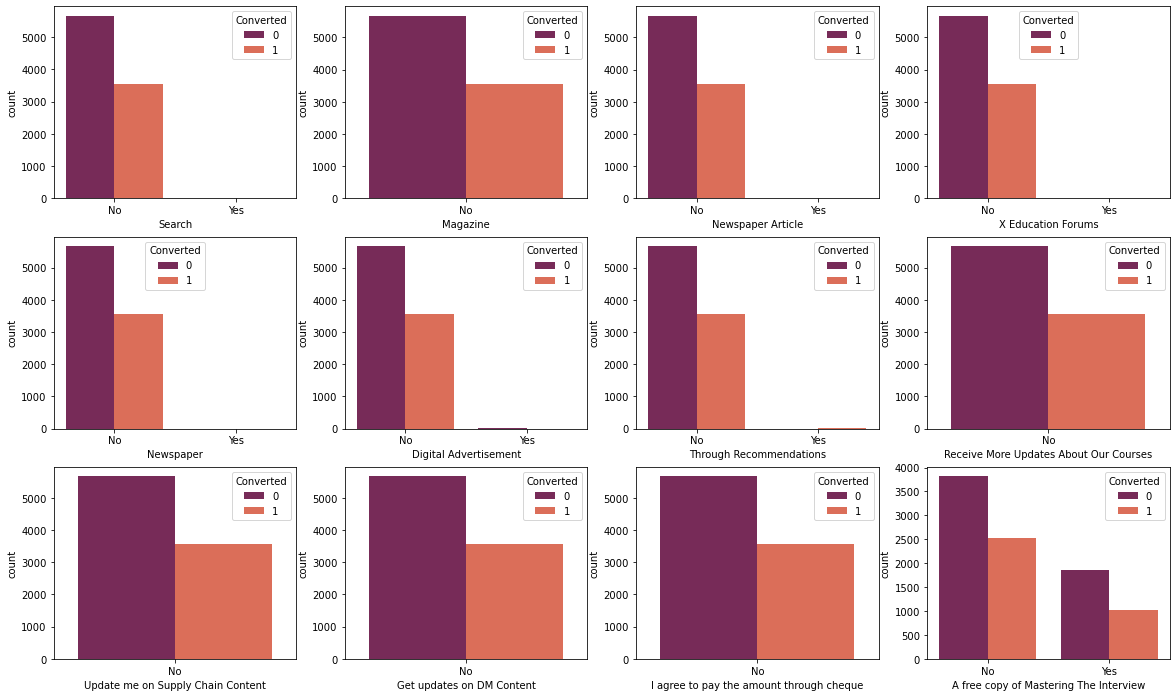

In [14]:
# Visualzing the variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = Lead, ax = axs[0,0],palette = 'rocket')
sns.countplot(x = "Magazine", hue = "Converted", data = Lead, ax = axs[0,1],palette = 'rocket')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = Lead, ax = axs[0,2],palette = 'rocket')
sns.countplot(x = "X Education Forums", hue = "Converted", data = Lead, ax = axs[0,3],palette = 'rocket')
sns.countplot(x = "Newspaper", hue = "Converted", data = Lead, ax = axs[1,0],palette = 'rocket')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = Lead, ax = axs[1,1],palette = 'rocket')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = Lead, ax = axs[1,2],palette = 'rocket')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = Lead, ax = axs[1,3],palette = 'rocket')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = Lead, ax = axs[2,0],palette = 'rocket')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = Lead, ax = axs[2,1],palette = 'rocket')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = Lead, ax = axs[2,2],palette = 'rocket')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = Lead, ax = axs[2,3],palette = 'rocket')
plt.show()

#### Inference

- For all the above columns except 'A free copy of Mastering The Interview', the data is highly imbalanced, thus we will drop them
- However, "A free copy of Mastering The Interview" is a redundant variable so we will drop this column also

In [15]:
# creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

#### Lead Source

In [16]:
# checking the value counts of Lead Source column

Lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### Google is having the highest number of occurences, hence we will impute the missing values with 'Google'.

In [17]:
# Replacing the Nan Values with Google
Lead['Lead Source'] = Lead['Lead Source'].replace(np.nan,'Google')

# 'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
Lead['Lead Source'] = Lead['Lead Source'].replace('google','Google')

In [18]:
# Combining low frequency values to Others

Lead['Lead Source'] = Lead['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

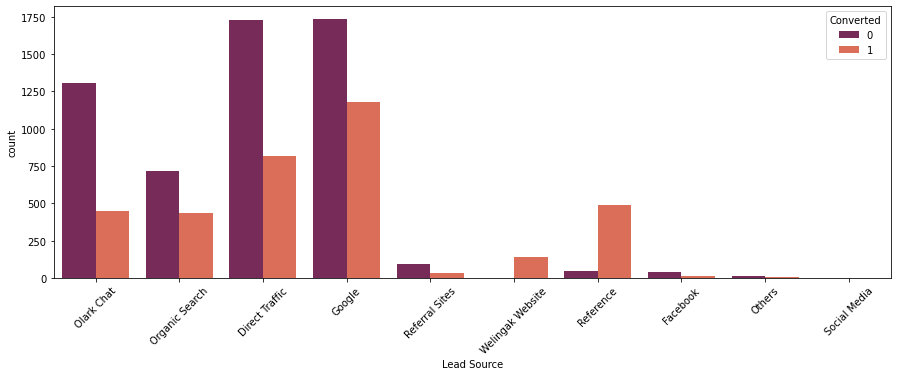

In [19]:
# Visualizing the count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =Lead , palette = 'rocket')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

#### Inference

- Maximum Leads are generated by Google and Direct Traffic.
- Conversion rate of Reference and Welinkgak Website leads is the highest.

### Country

In [20]:
# Checking the value counts of Country column

Lead['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

### Since, missing values are very high , we can impute all missing values with value 'No data'

In [21]:
# Imputing the missing values in Country column with "'no data"
Lead['Country'] = Lead['Country'].replace(np.nan,'No data')

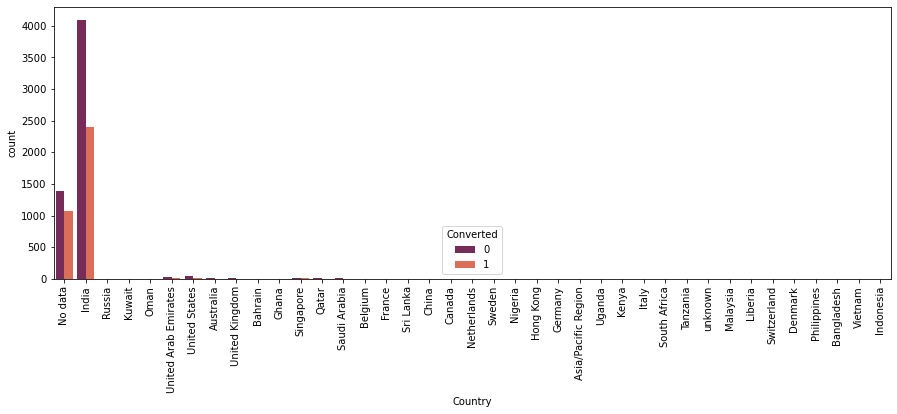

In [22]:
# Visualizing the Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =Lead , palette = 'rocket')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
As we can see that most of the data consists of the value 'India', no inference can be drawn from this parameter.Hence, we can drop this column.

In [23]:
# Creating a list of columns to be dropped

cols_to_drop.append('Country')

# Checking the list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

### What is your current occupation

In [24]:
# Checking value counts of 'What is your current occupation' column
Lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Since no information has been provided regarding occupation, we can replace missing values with new category 'No data'

In [25]:
# Creating a new category 'No data'

Lead['What is your current occupation'] = Lead['What is your current occupation'].replace(np.nan, 'No data')

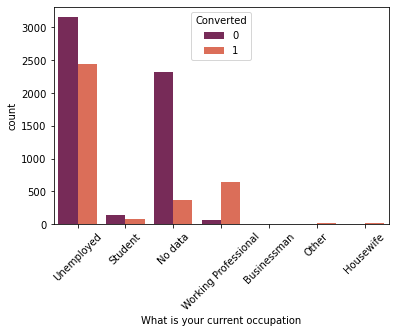

In [26]:
# Visualizing the count of variables based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = Lead , palette = 'rocket')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

#### Inference

- Maximum leads generated are unemployed and their conversion rate is more than 50%.
- Conversion rate of working professionals is very high.

### What matters most to you in choosing a course

In [27]:
# Checking the value counts of 'What matters most to you in choosing a course'

Lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

### It is clearly seen that missing values in the this column can be imputed by 'Better Career Prospects'

In [28]:
Lead['What matters most to you in choosing a course'] = Lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')


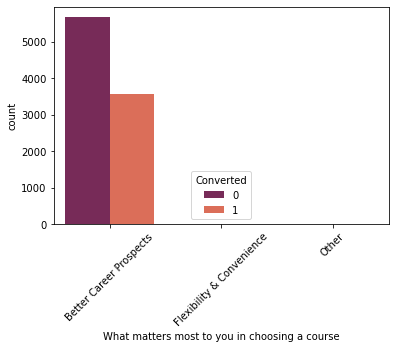

In [29]:
# Visualizing the count of variables based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = Lead , palette = 'rocket')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

### Inference
This column's spread of variance is very low , hence it can be dropped.

In [30]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

### Last Activity

In [31]:
# Checking the value counts of Last Activity
Lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

### Missing values can be imputed with mode value "Email Opened"

In [32]:
# Replacing Nan Values with mode value "Email Opened"

Lead['Last Activity'] = Lead['Last Activity'].replace(np.nan,'Email Opened')

In [33]:
# Combining the low frequency values
Lead['Last Activity'] = Lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

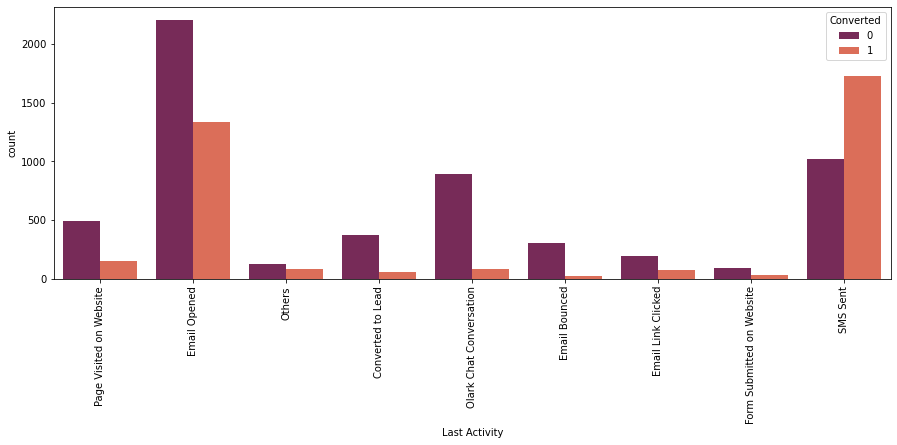

In [34]:
# Visualizing the count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = Lead , palette = 'rocket')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Inference

- Maximum leads are generated having last activity as Email opened, but the conversion rate is not satisfactory.
- Last acitivity as SMS sent has high conversion rate.

In [35]:
# Append 'Last Activity' to the cols_to_drop List because it is X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [36]:
# Check the Null Values in All Columns after imputation:
round(100*(Lead.isnull().sum()/len(Lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [37]:
# Remaining missing values percentage is less than 2%, hence we can drop these rows without affecting the data
Lead = Lead.dropna()

In [38]:
Lead.shape

(9103, 25)

In [39]:
# Checking the percentage of Null Values in all the Columns:
round(100*(Lead.isnull().sum()/len(Lead.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

### Lead Origin

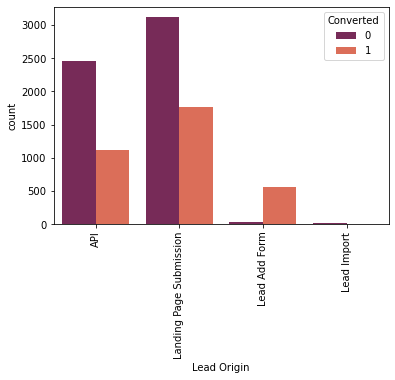

In [40]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = Lead , palette = 'rocket')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Do Not Email & Do Not Call

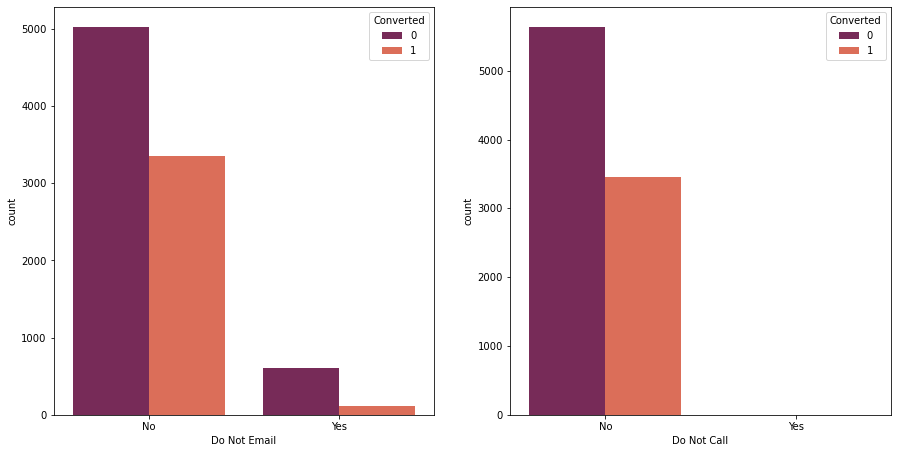

In [41]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = Lead, ax = axs[0],palette = 'rocket')
sns.countplot(x = "Do Not Call", hue = "Converted", data = Lead, ax = axs[1],palette = 'rocket')
plt.show()

### We Can append the Do Not Call Column to the list of Columns to be Dropped data is highly skewed

In [42]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

### Last Notable Activity

In [43]:
# Checking the value counts of last Notable Activity
Lead['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [44]:
#clubbing lower frequency values

Lead['Last Notable Activity'] = Lead['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

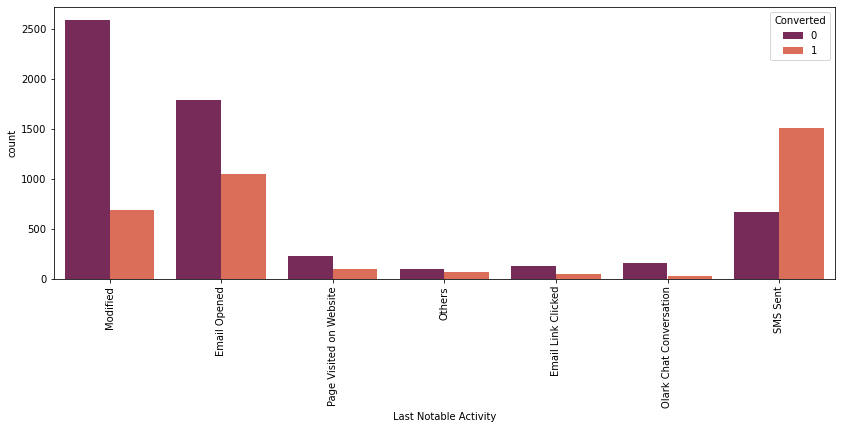

In [45]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Lead , palette = 'rocket')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

### Inference

- Maximum leads are generated having last activity as 'Email opened' but conversion rate is not satisfactory.
- Last activity as 'SMS sent' has high conversion rate.

In [46]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')

In [47]:
# checking final list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [48]:
#dropping columns
leads = Lead.drop(cols_to_drop,1)

#checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 898.1+ KB


In [49]:
#checking dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


## Numerical Attributes Analysis:
### Converted

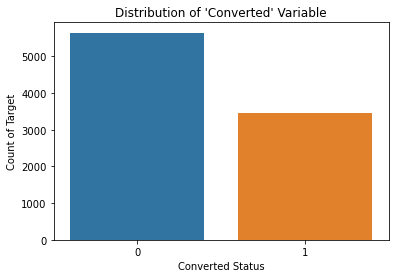

In [50]:
# Converted is the target variable. It indicates whether a lead has been successfully converted (1) or not (0).
# Visualizing the distribution of 'Converted' variable
sns.countplot(leads.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [51]:
# Checking the conversion rate
Converted = ((sum(leads['Converted'])/len(leads['Converted'].index))*100)
Converted

38.02043282434362

### Currently, lead Conversion rate is 38% only


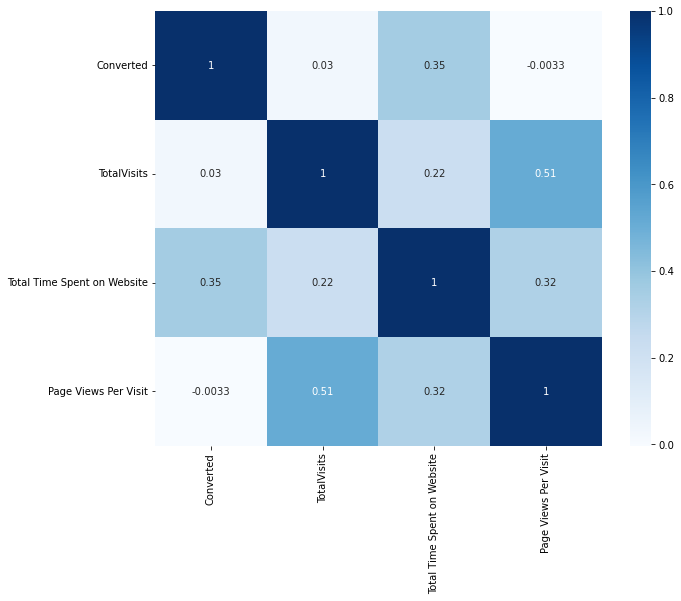

In [52]:
# Checking the correlations of numeric values using heatmap

plt.figure(figsize=(10,8))
sns.heatmap(leads.corr(), cmap="Blues", annot=True)
plt.show()

### Total Visits

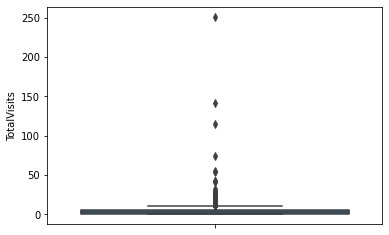

In [53]:
# Visualizing the spread of the variable Total Visits

sns.boxplot(y=leads['TotalVisits'])
plt.show()

### Presence of outliers is visible in the above boxplot

In [54]:
# Checking the percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

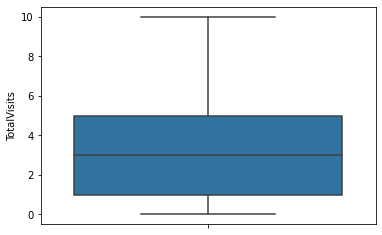

In [55]:
# Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

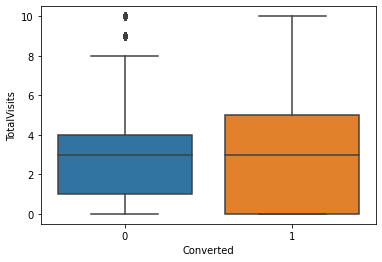

In [56]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

#### Inference
As the median for both converted and non-converted leads are same, nothing conclusive can be said on the basis of the variable 'TotalVisits'

In [57]:
# Checking the percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

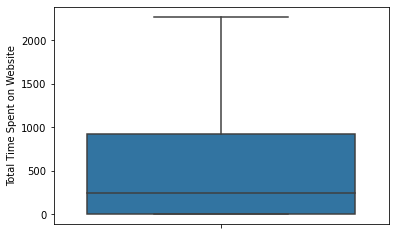

In [58]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

Since there are no major outliers for the above variable, outlier treatment is not required for it

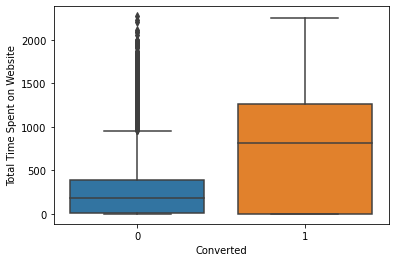

In [59]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

#### Inference
As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

### Page views per visit

In [60]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

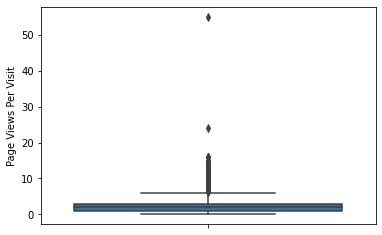

In [61]:
# Visualizing the spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

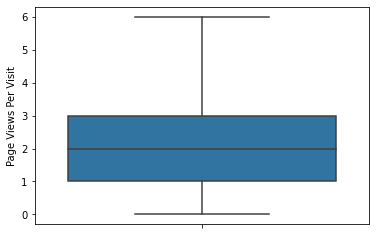

In [62]:
# Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

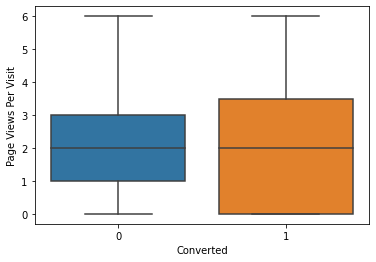

In [63]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

#### Inference

- Median for converted and not converted leads is almost same.
- Nothing conclusive can be said on the basis of Page Views Per Visit.

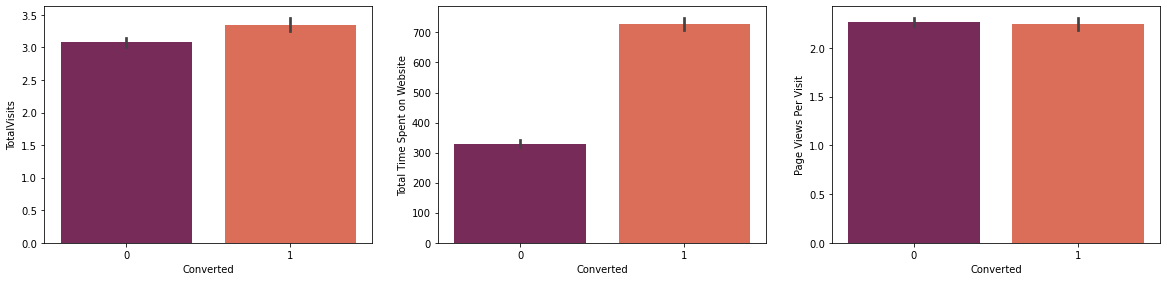

In [64]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='rocket', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='rocket', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='rocket', data = leads)
plt.show()

#### Inference
The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit

### Now, all the data labels are in good shape, we will proceed to our next step which is Data Preparation

## Data Preparation
### Converting some binary variables (Yes/No) to 0/1

In [65]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [66]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 898.1+ KB


### Dummy Variable Creation:

In [67]:
# Getting a list of categorical columns foy creating dummy variables

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [68]:
# Getting dummy variables and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],1)



dummy = pd.get_dummies(leads['Lead Source'], drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['What is your current occupation'], drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)


In [69]:
leads.drop(cat_cols,1,inplace = True)

In [168]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Facebook,Google,...,Reference,Referral Sites,Social Media,Welingak Website,Housewife,No data,Other,Student,Unemployed,Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [169]:
leads.shape

(9103, 23)

### Test-Train Split

In [71]:
# Importing library for splitting the dataset
from sklearn.model_selection import train_test_split

In [72]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

# Checking the head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Facebook,Google,Olark Chat,...,Reference,Referral Sites,Social Media,Welingak Website,Housewife,No data,Other,Student,Unemployed,Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
# Putting response variable to y
y = leads['Converted']

# Checking the head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [74]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [75]:
# Importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [76]:
# Scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Facebook,Google,Olark Chat,...,Reference,Referral Sites,Social Media,Welingak Website,Housewife,No data,Other,Student,Unemployed,Working Professional
7962,-0.294015,-0.068258,1.476324,-0.423364,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5520,-0.294015,1.362470,-0.771066,2.083179,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,-0.294015,0.647106,-0.571257,0.133646,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1566,-0.294015,2.435517,1.393834,0.690655,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9170,-0.294015,-1.141305,-0.881052,-1.258878,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [77]:
## Checking the conversion rate of 'Converted' column, as it denotes the target variable

(sum(y)/len(y.index))*100

38.02043282434362

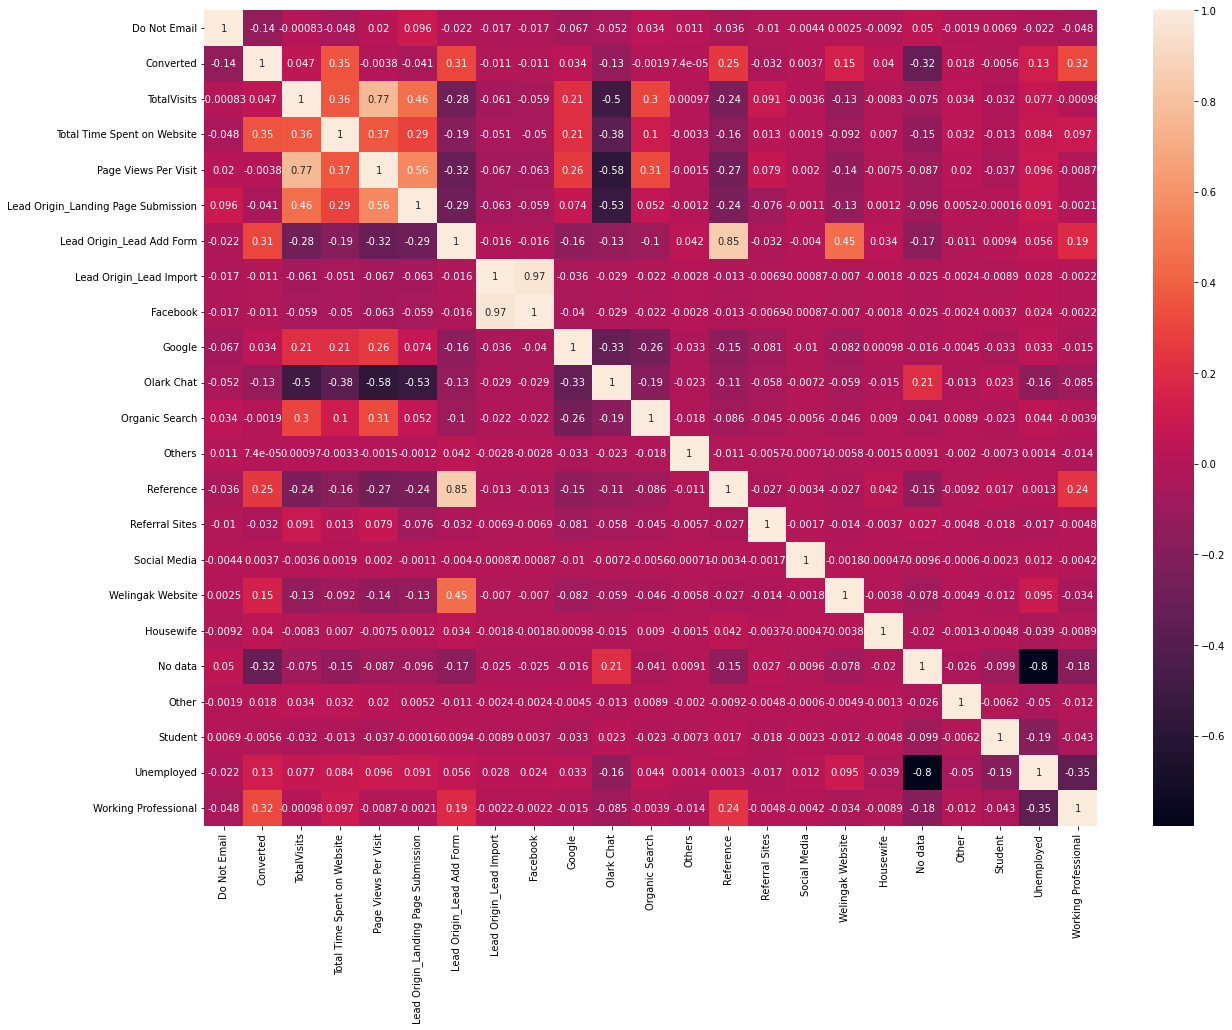

In [78]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))       
sns.heatmap(leads.corr(),annot = True)
plt.show()

### Dropping the highly correlated dummy variables

In [79]:
X_test = X_test.drop(['Olark Chat','Lead Origin_Landing Page Submission'],1)

In [80]:
X_train = X_train.drop(['Olark Chat','Lead Origin_Landing Page Submission'],1)

### Model Building using Stats Model & RFE

In [81]:
# Importing the library
import statsmodels.api as sm

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [83]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True])

In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Facebook', False, 2),
 ('Google', False, 6),
 ('Organic Search', False, 4),
 ('Others', True, 1),
 ('Reference', False, 5),
 ('Referral Sites', True, 1),
 ('Social Media', False, 3),
 ('Welingak Website', True, 1),
 ('Housewife', True, 1),
 ('No data', True, 1),
 ('Other', True, 1),
 ('Student', True, 1),
 ('Unemployed', True, 1),
 ('Working Professional', True, 1)]

In [85]:
# list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Others', 'Referral Sites',
       'Welingak Website', 'Housewife', 'No data', 'Other', 'Student',
       'Unemployed', 'Working Professional'],
      dtype='object')

In [86]:
X_train.columns[~rfe.support_]

Index(['Facebook', 'Google', 'Organic Search', 'Reference', 'Social Media'], dtype='object')

### Model 1

In [87]:
# BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2891.7
Date:                Tue, 15 Nov 2022   Deviance:                       5783.5
Time:                        10:01:38   Pearson chi2:                 6.42e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5485      0.991     -0.554      0.580      -2.491       1.394
Do Not Email                   -0.3728      0.042     -8.851      0.000      -0.455      -0.290
TotalVisits                     0.2270      0.048      4.719      0.000       0.133       0.321
Total Time Spent on Website     0.9813      0.036     27.607      0.000       0.912       1.051
Page Views Per Visit           -0.3229      0.051     -6.301      0.000      -0.423      -0.222
Lead Origin_Lead Add Form       3.3825      0.222     15.237      0.000       2.947       3.818
Lead Origin_Lead Import         0.5190      0.441      1.177      0.239      -0.345       1.383
Others                         -0.5571      0.726     -0.768      0.443      -1.979       0.865
Referral Sites                 -0.5840      0.317     -1.843      0.065      -1.205       0.037
Welingak Website                1.9848      0.750      2.647      0.008       0.515       3.454
Housewife                      22.3200   1.63e+04      0.001      0.999   -3.19e+04     3.2e+04
No data                        -1.3381      0.994     -1.347      0.178      -3.285       0.609
Other                          -0.1918      1.178     -0.163      0.871      -2.500       2.117
Student                        -0.2045      1.013     -0.202      0.840      -2.191       1.782
Unemployed                     -0.1016      0.991     -0.102      0.918      -2.045       1.842
Working Professional            2.3897      1.006      2.376      0.018       0.418       4.361
===============================================================================================
"""

#### p-value of variable Housewife is high, so we can drop it.


In [88]:
#dropping column with high p-value

col = col.drop('Housewife',1)

### Model 2

In [89]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2894.1
Date:                Tue, 15 Nov 2022   Deviance:                       5788.2
Time:                        10:01:38   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7179      0.728      0.986      0.324      -0.709       2.145
Do Not Email                   -0.3729      0.042     -8.852      0.000      -0.455      -0.290
TotalVisits                     0.2249      0.048      4.677      0.000       0.131       0.319
Total Time Spent on Website     0.9822      0.036     27.637      0.000       0.913       1.052
Page Views Per Visit           -0.3222      0.051     -6.290      0.000      -0.423      -0.222
Lead Origin_Lead Add Form       3.3800      0.222     15.227      0.000       2.945       3.815
Lead Origin_Lead Import         0.5183      0.441      1.175      0.240      -0.346       1.383
Others                         -0.5565      0.726     -0.767      0.443      -1.979       0.866
Referral Sites                 -0.5832      0.317     -1.840      0.066      -1.204       0.038
Welingak Website                1.9866      0.750      2.650      0.008       0.517       3.456
No data                        -2.6046      0.732     -3.559      0.000      -4.039      -1.170
Other                          -1.4575      0.968     -1.506      0.132      -3.354       0.439
Student                        -1.4708      0.759     -1.939      0.053      -2.958       0.016
Unemployed                     -1.3679      0.729     -1.876      0.061      -2.797       0.061
Working Professional            1.1234      0.748      1.501      0.133      -0.344       2.590
===============================================================================================
"""

#### p-value of variable "Others" is high, so we will drop it.

In [90]:
#dropping column with high p-value

col = col.drop('Others',1)

### Model 3

In [91]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2894.4
Date:                Tue, 15 Nov 2022   Deviance:                       5788.9
Time:                        10:01:39   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7184      0.728      0.987      0.324      -0.709       2.146
Do Not Email                   -0.3725      0.042     -8.848      0.000      -0.455      -0.290
TotalVisits                     0.2248      0.048      4.675      0.000       0.131       0.319
Total Time Spent on Website     0.9823      0.036     27.639      0.000       0.913       1.052
Page Views Per Visit           -0.3221      0.051     -6.287      0.000      -0.422      -0.222
Lead Origin_Lead Add Form       3.3678      0.221     15.232      0.000       2.934       3.801
Lead Origin_Lead Import         0.5192      0.441      1.177      0.239      -0.345       1.384
Referral Sites                 -0.5822      0.317     -1.837      0.066      -1.203       0.039
Welingak Website                1.9994      0.749      2.668      0.008       0.530       3.468
No data                        -2.6069      0.732     -3.562      0.000      -4.041      -1.173
Other                          -1.4580      0.968     -1.507      0.132      -3.355       0.439
Student                        -1.4708      0.759     -1.939      0.053      -2.957       0.016
Unemployed                     -1.3691      0.729     -1.878      0.060      -2.798       0.060
Working Professional            1.1232      0.748      1.501      0.133      -0.344       2.590
===============================================================================================
"""

#### Variable 'Lead Origin_Lead Import' has high p-value, so it needs to be dropped

In [92]:
# Dropping column with high p-value

col = col.drop('Lead Origin_Lead Import',1)

### Model 4

In [93]:
# BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2895.1
Date:                Tue, 15 Nov 2022   Deviance:                       5790.2
Time:                        10:01:39   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7193      0.728      0.988      0.323      -0.708       2.146
Do Not Email                   -0.3732      0.042     -8.866      0.000      -0.456      -0.291
TotalVisits                     0.2237      0.048      4.652      0.000       0.129       0.318
Total Time Spent on Website     0.9805      0.036     27.618      0.000       0.911       1.050
Page Views Per Visit           -0.3247      0.051     -6.345      0.000      -0.425      -0.224
Lead Origin_Lead Add Form       3.3576      0.221     15.199      0.000       2.925       3.791
Referral Sites                 -0.5825      0.317     -1.838      0.066      -1.203       0.039
Welingak Website                1.9997      0.749      2.668      0.008       0.531       3.469
No data                        -2.6069      0.732     -3.563      0.000      -4.041      -1.173
Other                          -1.4557      0.968     -1.505      0.132      -3.352       0.441
Student                        -1.4716      0.758     -1.941      0.052      -2.958       0.015
Unemployed                     -1.3657      0.729     -1.874      0.061      -2.794       0.063
Working Professional            1.1275      0.748      1.507      0.132      -0.339       2.594
===============================================================================================
"""

In [94]:
# Dropping column with high p-value

col = col.drop('Working Professional',1)

### Model 5

In [95]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.1
Date:                Tue, 15 Nov 2022   Deviance:                       5792.1
Time:                        10:01:39   Pearson chi2:                 6.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.7991      0.168     10.725      0.000       1.470       2.128
Do Not Email                   -0.3724      0.042     -8.857      0.000      -0.455      -0.290
TotalVisits                     0.2224      0.048      4.626      0.000       0.128       0.317
Total Time Spent on Website     0.9808      0.036     27.627      0.000       0.911       1.050
Page Views Per Visit           -0.3240      0.051     -6.333      0.000      -0.424      -0.224
Lead Origin_Lead Add Form       3.3577      0.221     15.201      0.000       2.925       3.791
Referral Sites                 -0.5803      0.317     -1.833      0.067      -1.201       0.040
Welingak Website                1.9985      0.749      2.667      0.008       0.530       3.467
No data                        -3.6866      0.183    -20.092      0.000      -4.046      -3.327
Other                          -2.5350      0.660     -3.843      0.000      -3.828      -1.242
Student                        -2.5513      0.271     -9.425      0.000      -3.082      -2.021
Unemployed                     -2.4454      0.172    -14.215      0.000      -2.783      -2.108
===============================================================================================
"""

In [96]:
# Dropping column with high p-value

col = col.drop('Welingak Website',1)

### Model 6

In [97]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2901.9
Date:                Tue, 15 Nov 2022   Deviance:                       5803.9
Time:                        10:01:39   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.7898      0.168     10.663      0.000       1.461       2.119
Do Not Email                   -0.3644      0.041     -8.814      0.000      -0.445      -0.283
TotalVisits                     0.2223      0.048      4.626      0.000       0.128       0.317
Total Time Spent on Website     0.9802      0.035     27.624      0.000       0.911       1.050
Page Views Per Visit           -0.3240      0.051     -6.335      0.000      -0.424      -0.224
Lead Origin_Lead Add Form       3.7166      0.212     17.566      0.000       3.302       4.131
Referral Sites                 -0.5796      0.316     -1.832      0.067      -1.200       0.041
No data                        -3.6760      0.184    -20.025      0.000      -4.036      -3.316
Other                          -2.5258      0.659     -3.831      0.000      -3.818      -1.233
Student                        -2.5522      0.272     -9.393      0.000      -3.085      -2.020
Unemployed                     -2.4341      0.172    -14.136      0.000      -2.772      -2.097
===============================================================================================
"""

In [98]:
# Dropping column with high p-value

col = col.drop('Referral Sites',1)

### Model 7



In [99]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6362
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2903.7
Date:                Tue, 15 Nov 2022   Deviance:                       5807.5
Time:                        10:01:39   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.7857      0.168     10.635      0.000       1.457       2.115
Do Not Email                   -0.3635      0.041     -8.794      0.000      -0.445      -0.282
TotalVisits                     0.2184      0.048      4.554      0.000       0.124       0.312
Total Time Spent on Website     0.9817      0.035     27.669      0.000       0.912       1.051
Page Views Per Visit           -0.3261      0.051     -6.378      0.000      -0.426      -0.226
Lead Origin_Lead Add Form       3.7164      0.212     17.567      0.000       3.302       4.131
No data                        -3.6812      0.184    -20.047      0.000      -4.041      -3.321
Other                          -2.5191      0.660     -3.819      0.000      -3.812      -1.226
Student                        -2.5483      0.272     -9.379      0.000      -3.081      -2.016
Unemployed                     -2.4361      0.172    -14.141      0.000      -2.774      -2.098
===============================================================================================
"""

#### Since the Model 7 seems to be stable with significant p-values, we shall go ahead with this model for further analysis


### Calculating VIF

In [100]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,2.54
1,TotalVisits,2.48
4,Lead Origin_Lead Add Form,1.21
2,Total Time Spent on Website,1.20
8,Unemployed,1.09
5,No data,1.02
0,Do Not Email,1.01
6,Other,1.00
7,Student,1.00


#### All variables have a good VIF value. So we need not drop any more variables and we can proceed with making predictions using this model.

## Predicting a Train model

In [101]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.736698
5520    0.156807
1962    0.267644
1566    0.972551
9170    0.223168
5097    0.076389
8954    0.382268
309     0.302072
5519    0.076389
1050    0.623734
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.7366977 , 0.15680694, 0.26764419, 0.97255139, 0.22316778,
       0.07638927, 0.38226808, 0.30207227, 0.07638927, 0.62373435])

In [103]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.736698,7962
1,0,0.156807,5520
2,0,0.267644,1962
3,1,0.972551,1566
4,0,0.223168,9170


In [104]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.736698,7962,1
1,0,0.156807,5520,0
2,0,0.267644,1962,0
3,1,0.972551,1566,1
4,0,0.223168,9170,0


### Metrics - Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [105]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3541  412]
 [ 863 1556]]


In [106]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7999058380414312


In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6432410086812732

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.895775360485707

In [110]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10422463951429294


In [111]:
# Positive predictive value 
print (TP / float(TP+FP))

0.790650406504065


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8040417801998183


### PLOTTING THE ROC CURVE

#### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


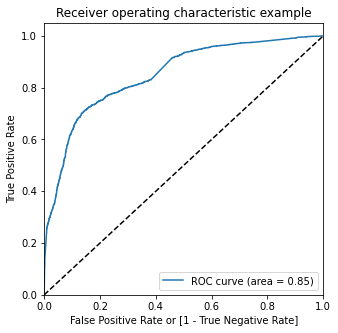

In [115]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


#### The ROC Curve should be a value close to 1. We are getting a good value of 0.85 indicating a good predictive model.

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity



In [116]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.736698,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.156807,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.267644,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.972551,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.223168,9170,0,1,1,1,0,0,0,0,0,0,0


In [117]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.569680  0.967755  0.326081
0.2   0.2  0.654583  0.939644  0.480142
0.3   0.3  0.771500  0.771807  0.771313
0.4   0.4  0.801161  0.708557  0.857829
0.5   0.5  0.799906  0.643241  0.895775
0.6   0.6  0.786409  0.569657  0.919049
0.7   0.7  0.761456  0.467962  0.941057
0.8   0.8  0.726930  0.326995  0.971667
0.9   0.9  0.710452  0.252170  0.990893


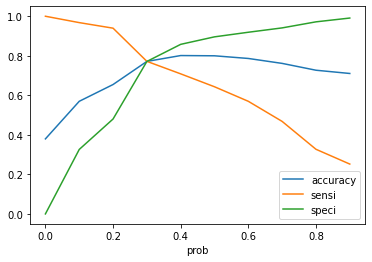

In [118]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.


In [119]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.736698,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.156807,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.267644,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.972551,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.223168,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [120]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.736698,7962,1,74
1,0,0.156807,5520,0,16
2,0,0.267644,1962,0,27
3,1,0.972551,1566,1,97
4,0,0.223168,9170,0,22


In [121]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1867
0     552
Name: final_Predicted, dtype: int64

In [122]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

## Hence, we can see that the final prediction of conversions have a target of 83% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.
### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7715003138731952

In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3049,  904],
       [ 552, 1867]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7718065316246383

In [127]:
# Let us calculate specificity
TN / float(TN+FP)

0.7713129268909689

#### Inference:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.85, which is very good. We have the following values for the Train Data:

- Accuracy : 77.15%
- Sensitivity :77.18%
- Specificity : 77.13%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [128]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2286870731090311


In [129]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6737639841212558


In [130]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8467092474312691


### Precision and Recall

In [131]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3049,  904],
       [ 552, 1867]], dtype=int64)

In [132]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6737639841212558

In [133]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7718065316246383

In [134]:
from sklearn.metrics import precision_score, recall_score 

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6737639841212558

In [135]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7718065316246383

### Precision and Recall Trade-off

In [136]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [137]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

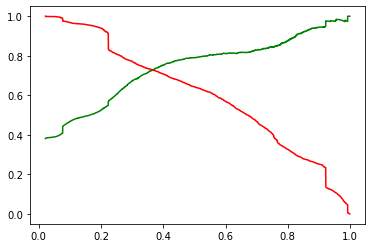

In [138]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Predictions on the test set

In [139]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Facebook,Google,Organic Search,Others,Reference,Referral Sites,Social Media,Welingak Website,Housewife,No data,Other,Student,Unemployed,Working Professional
3504,-0.293797,-0.058621,-0.108519,0.416452,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4050,-0.293797,-1.150166,-0.888077,-1.263530,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7201,3.403712,-0.422469,0.420993,-0.143542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,-0.293797,0.305228,-0.110357,0.976446,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8219,-0.293797,1.396773,-0.433947,-0.283540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [140]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,No data,Other,Student,Unemployed
3504,-0.293797,-0.058621,-0.108519,0.416452,0,0,0,0,1
4050,-0.293797,-1.150166,-0.888077,-1.263530,1,0,0,0,1
7201,3.403712,-0.422469,0.420993,-0.143542,0,0,0,0,1
1196,-0.293797,0.305228,-0.110357,0.976446,0,0,0,0,1
8219,-0.293797,1.396773,-0.433947,-0.283540,0,0,0,0,1


In [141]:
X_test_sm = sm.add_constant(X_test)

In [142]:
X_test_sm.shape

(2731, 10)

In [143]:
y_test_pred = res.predict(X_test_sm)  

In [144]:
y_test_pred[:10]

3504    0.310289
4050    0.921415
7201    0.179481
1196    0.288291
8219    0.360747
8747    0.075869
9048    0.244785
6524    0.240399
7693    0.073124
8187    0.921415
dtype: float64

In [145]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [146]:
# Let's see the head
y_pred_1.head()

,0
3504,0.310289
4050,0.921415
7201,0.179481
1196,0.288291
8219,0.360747


In [147]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [148]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [149]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [150]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [151]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.310289
1,1,4050,0.921415
2,0,7201,0.179481
3,0,1196,0.288291
4,1,8219,0.360747


In [152]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [153]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.310289
1,1,4050,0.921415
2,0,7201,0.179481
3,0,1196,0.288291
4,1,8219,0.360747


### Assigning Lead Score

In [154]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [155]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.310289,31
1,4050,1,0.921415,92
2,7201,0,0.179481,18
3,1196,0,0.288291,29
4,8219,1,0.360747,36


In [156]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [157]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.310289,31,1
1,4050,1,0.921415,92,1
2,7201,0,0.179481,18,0
3,1196,0,0.288291,29,0
4,8219,1,0.360747,36,1


In [158]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    794
0    248
Name: final_Predicted, dtype: int64

In [159]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

## Hence we can see that the final prediction of conversions have a target rate of 83% (same as predictions made on training data set)
### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [160]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7700476016111315

In [161]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1309,  380],
       [ 248,  794]], dtype=int64)

In [162]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [163]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.761996161228407

In [164]:
# Let us calculate specificity
TN / float(TN+FP)

0.7750148016577857

### Precision and Recall metrics for the test set

In [165]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)


0.676320272572402

In [166]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)


0.761996161228407

### Inference:
After running the model on the Test Data these are the figures we obtain:

- Accuracy : 77.00%
- Sensitivity :76.2%
- Specificity : 77.50%

## Conclusion:

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 77%, 76% and 77.5% which are approximately closer to the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
- Hence overall this model seems to be good.

#### Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :

- Lead Origin_Lead Add Form 
- Total Time Spent on website
- Total Visits